In [1]:
import sys

sys.path.append("/Users/david/Documents/mastersCode/ubm")
print(sys.path)

['/Users/david/Documents/mastersCode/ubm/final/models/gmm/bgmm', '/Users/david/.conda/envs/ubm/lib/python310.zip', '/Users/david/.conda/envs/ubm/lib/python3.10', '/Users/david/.conda/envs/ubm/lib/python3.10/lib-dynload', '', '/Users/david/.conda/envs/ubm/lib/python3.10/site-packages', '/Users/david/Documents/mastersCode/ubm']


In [13]:
import pickle
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Load state sequence and data from the pickle file
with open('/Users/david/Documents/mastersCode/ubm/final/models/gmm/data/gmm_data_a.pkl', 'rb') as file:
    gmm_data = pickle.load(file)

# Access the loaded data
loaded_data = gmm_data['data']
loaded_labels = gmm_data['labels']

In [11]:
import final.models.gmm.bgmm.bgmm as bgmm
reload(bgmm)

my_bgmm = bgmm.GMMGibbsSampler(loaded_data, 5, Z_true=loaded_labels)

In [12]:
my_bgmm.fit()

starting gibbs sampling


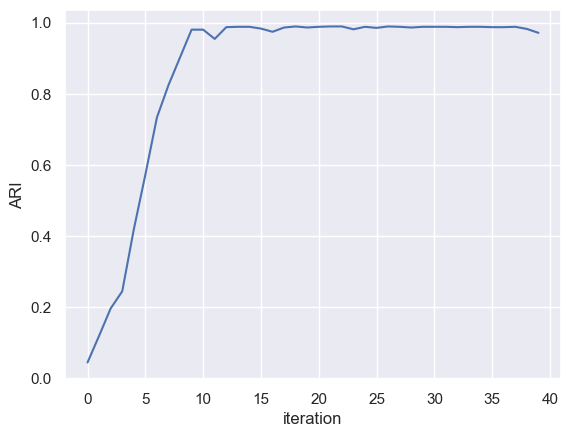

In [14]:
plt.plot(range(0,len(my_bgmm.ARI)), my_bgmm.ARI, marker="None")
plt.xlabel('iteration')
plt.ylabel('ARI')
#plt.savefig("./image/ari.png")
plt.show()
plt.close()

In [112]:
# MC integration
from scipy.stats import  wishart, dirichlet, invwishart, multivariate_normal

def niw_mc_estimate(x, m, v, nu, s, N):
    mus = []
    sigmas = []
    for i in range(N):
        mus.append(np.random.multivariate_normal(mean=m, cov=v, size=1).flatten())
        sigmas.append(invwishart.rvs(size=1, df=nu, scale=s))
    p = 0
    for i in range(N):
        p += multivariate_normal.pdf(x, mus[i], sigmas[i]) * multivariate_normal.pdf(mus[i], m, v) * invwishart.pdf(sigmas[i], df=nu, scale=s)
    return p / N


In [121]:
m0 = np.array([1,1])
v0 = np.array([[1, 0],[0, 1]])

s0 = np.array([[1, 0],[0, 1]])
nu0 = 4

x = np.array([4,1])

print(niw_mc_estimate(x, m0, v0, nu0, s0, int(1e1)))




1.4246519372537228e-05


In [ ]:
def niw_mc_estimate_plot_scatters(x, m, v, nu, s, N):
    mus = []
    sigmas = []
    for i in range(N):
        mus.append(np.random.multivariate_normal(mean=m, cov=v, size=1).flatten())
        sigmas.append(invwishart.rvs(size=1, df=nu, scale=s))
    return np

In [92]:
np.max(x, axis=0)

array([21.80062438, 36.87571389])

0.061897229942019134


0.00036879479190479416


0.18991951299418494

4.324863225724479
